In [30]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [31]:
def get_tsne_plot(address):
    data = pd.read_csv('ProgressDataOutputArchive/CongestionPattern/'+address+'.csv')
    data = data.iloc[:,1:10].copy()
    
    # Dimension reduction by TSNE
    tsne_model = TSNE()
    tsne_model.fit_transform(data[['Left', 'Right', 'Straight']])
    data_tsne = pd.DataFrame(tsne_model.embedding_, index=data.index)
    data_tsne['cluster'] = data['cluster']
    
    cluster = data_tsne['cluster'].unique().tolist()
    print(len(cluster))
    shapemap = {0:'o', 1:'x', 2:'+', 3:'s', 4:'d', 5:'v', 6:'<'}
    
    plt.figure(figsize=(10,10))
    for n in cluster:
        clusterselect = data_tsne[data_tsne['cluster'] == n]
        plt.plot(clusterselect[0], clusterselect[1], shapemap[n])
    
    path = 'ProgressDataOutputArchive/TSNEPlot/'
    if not os.path.exists(path):
        os.mkdir(path)
    plt.savefig(path+address+'.png')

6
5
5
6
6
3
3
4
4
4


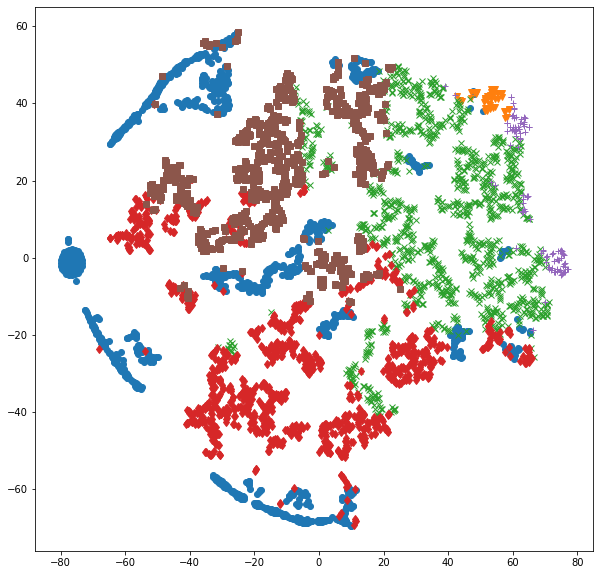

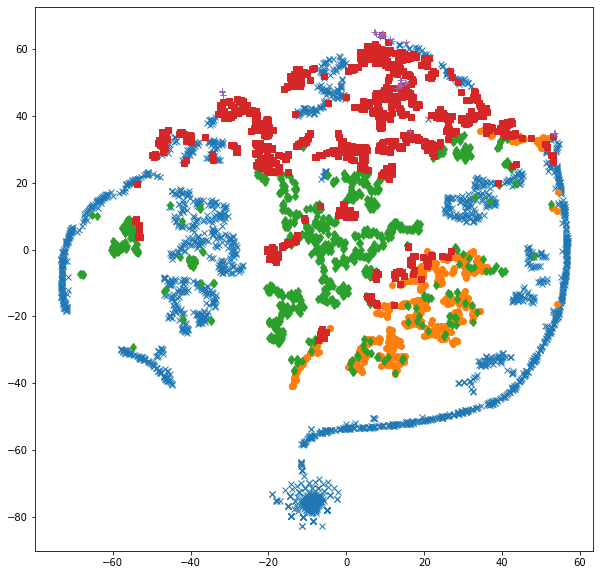

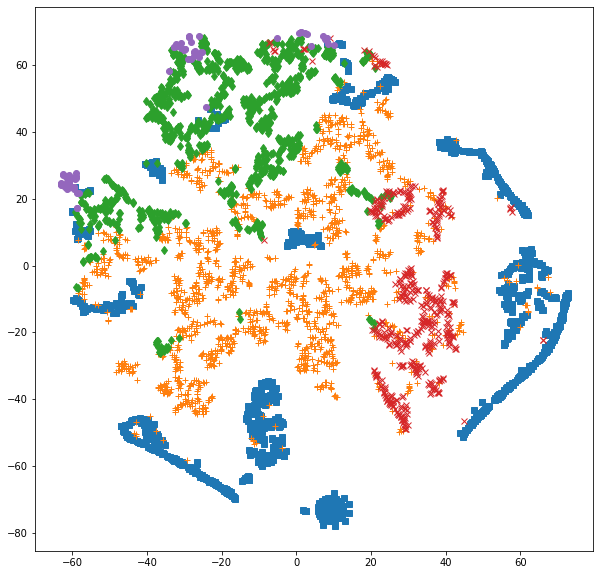

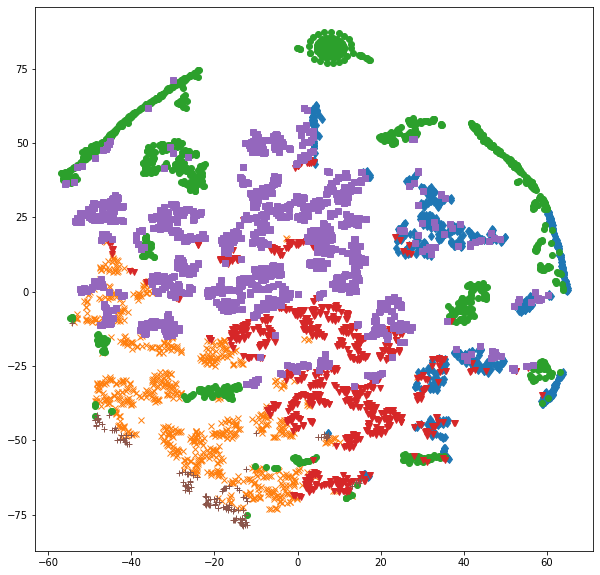

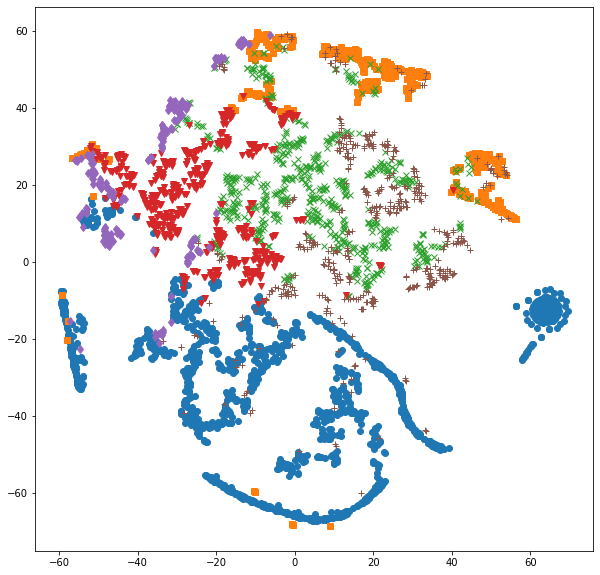

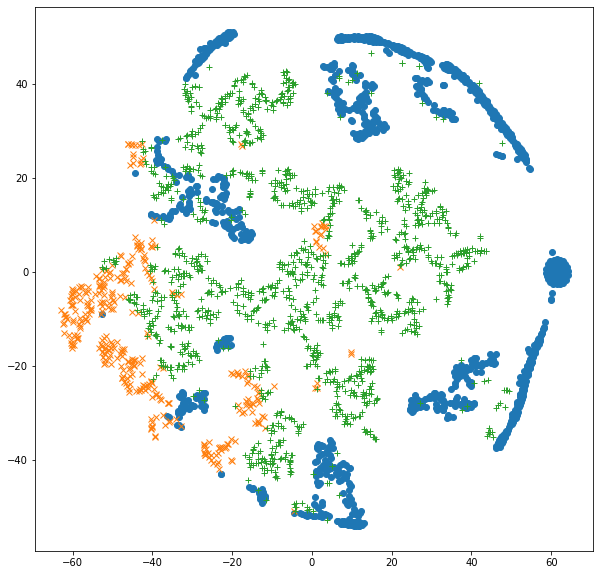

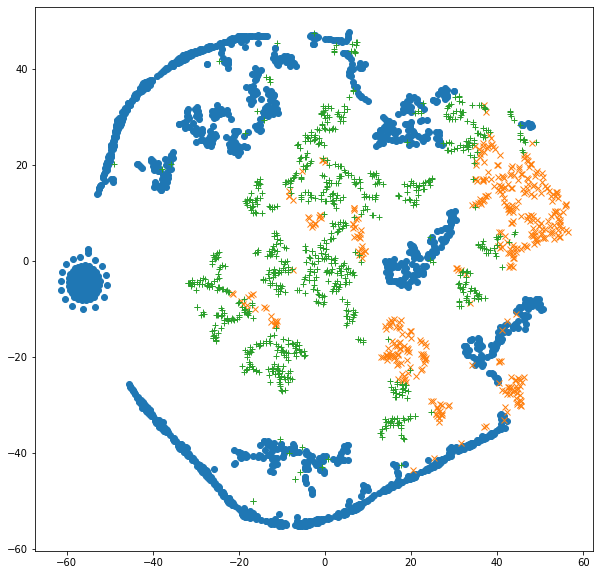

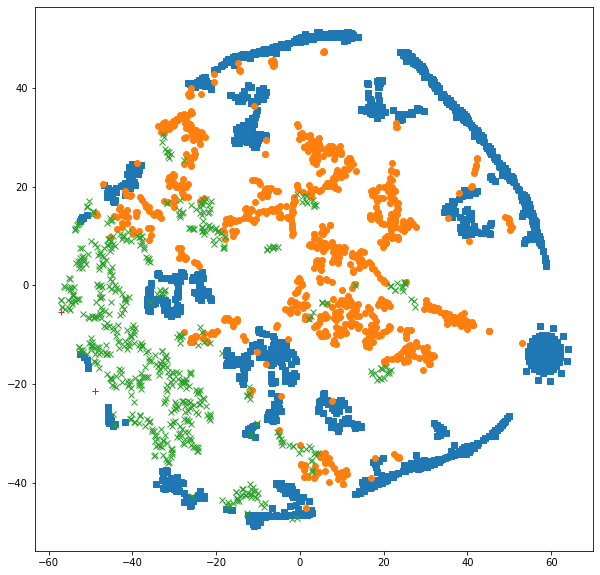

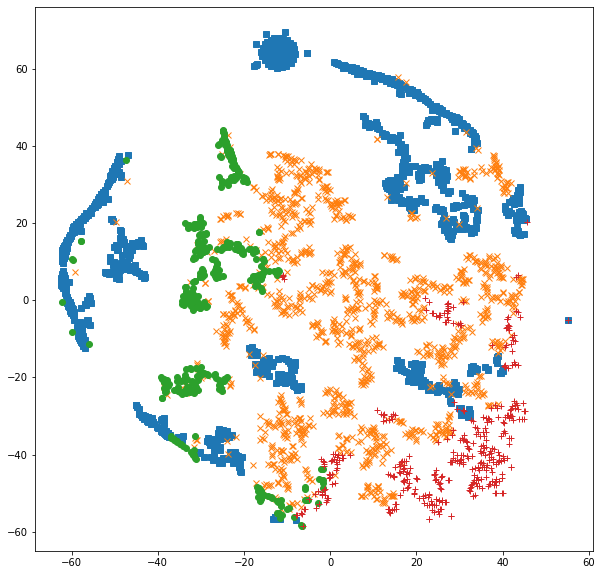

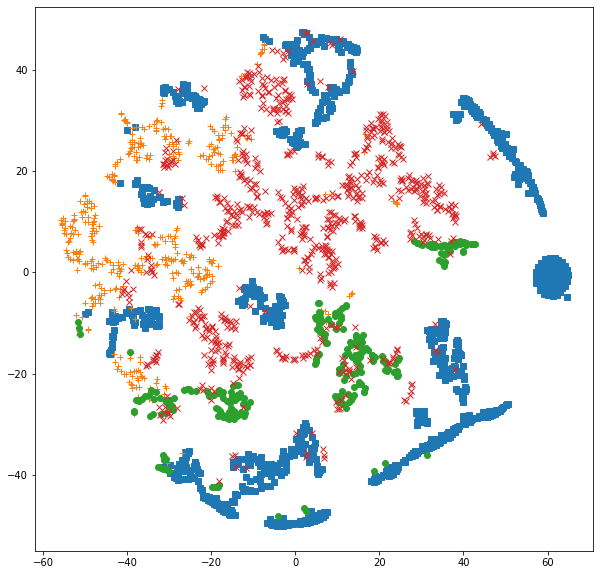

In [32]:
get_tsne_plot('Weekday_EveningBusy')
get_tsne_plot('Weekday_Midnight')
get_tsne_plot('Weekday_Morningbusy')
get_tsne_plot('Weekday_Normalday')
get_tsne_plot('Weekday_Normalnight')
get_tsne_plot('Weekend_EveningBusy')
get_tsne_plot('Weekend_Midnight')
get_tsne_plot('Weekend_Morningbusy')
get_tsne_plot('Weekend_Normalday')
get_tsne_plot('Weekend_Normalnight')